**Importação de** **Dados**


In [2]:
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [8]:
df = pd.read_json("/content/TelecomX_Data (2).json")
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Limpeza de Dados**

In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [15]:
# Extrair 'TotalCharges' da coluna 'account'
df["TotalCharges"] = df["account"].apply(lambda x: x.get("TotalCharges"))

# Converter TotalCharges para numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Preencher nulos
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

**Encoding**

**Target (Churn)**

In [16]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

**Variáveis categóricas**

In [18]:
dict_columns = ['customer', 'phone', 'internet', 'account']

for col in dict_columns:
    # Expand dictionary column into new columns
    df = pd.concat([df, df[col].apply(pd.Series)], axis=1)
    # Drop the original dictionary column
    df = df.drop(columns=[col])

# Display the first few rows to verify the changes
df.head()

,Churn,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0.0,NaN,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0.0,NaN,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,1.0,NaN,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,1.0,NaN,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,1.0,NaN,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [19]:
df = pd.concat([df, df['Charges'].apply(pd.Series)], axis=1)
df = df.drop(columns=['Charges'])

df.head()

,Churn,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0.0,NaN,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0.0,NaN,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,1.0,NaN,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1.0,NaN,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1.0,NaN,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Reasoning**:
The 'Total' column, extracted from the 'Charges' dictionary, is currently of object type and needs to be converted to a numeric type to be used in model training. This step converts it to numeric and fills any resulting NaN values.



In [20]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Total'] = df['Total'].fillna(df['Total'].median())

# Drop the problematic 'TotalCharges' column if it exists and is mostly NaN
# After inspecting previous outputs, 'TotalCharges' was poorly extracted and is likely redundant.
if 'TotalCharges' in df.columns:
    if df['TotalCharges'].isnull().all(): # Check if all values are NaN
        df = df.drop(columns=['TotalCharges'])
    elif df['TotalCharges'].isnull().sum() > 0: # If there are some NaNs, fill them as well
        df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


**Normalização**

In [22]:
scaler = StandardScaler()

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_scaled = scaler.fit_transform(X)

**Seleção de Variáveis**

**Correlação**

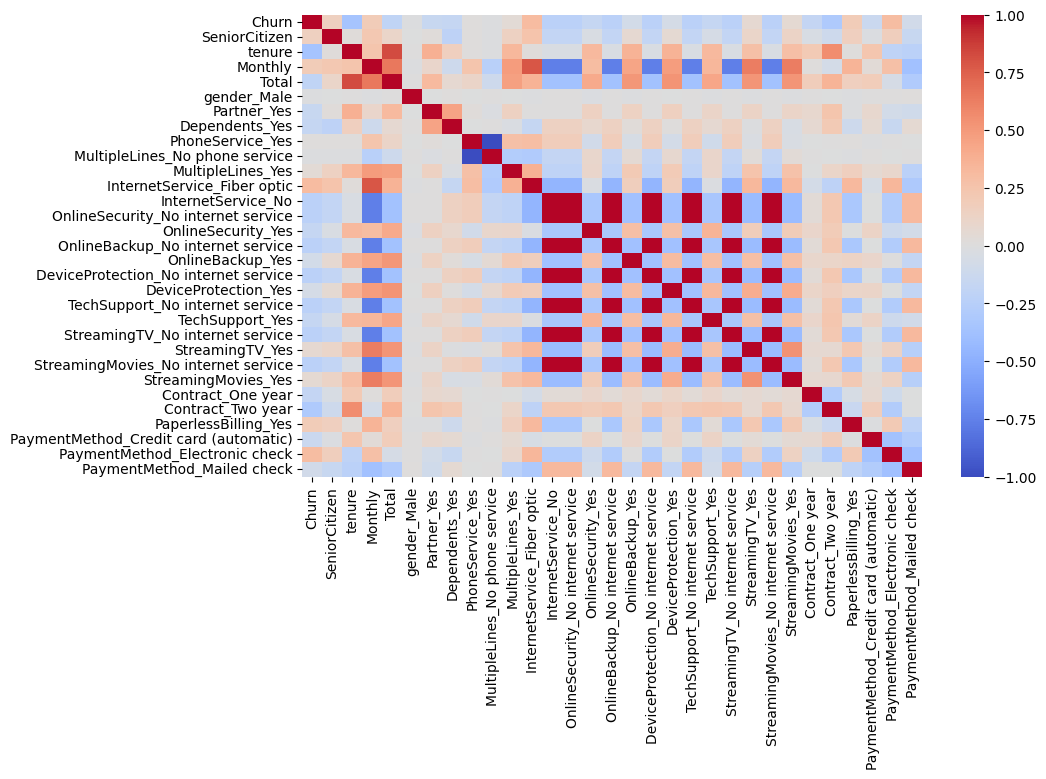

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

Analisar:

Variáveis altamente correlacionadas com Churn

Variáveis altamente correlacionadas entre si (multicolinearidade)

**Seleção simples**

In [24]:
correlation = df.corr()["Churn"].sort_values(ascending=False)
print(correlation.head(10))

Churn                             1.000000
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
Monthly                           0.193356
PaperlessBilling_Yes              0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
PhoneService_Yes                  0.011942
Name: Churn, dtype: float64


Principais variáveis geralmente associadas ao churn:

Tipo de contrato (Month-to-month)

Tenure (tempo de contrato)

MonthlyCharges

Tipo de internet (Fiber optic)

**Treino**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

**Modelo 1: Regressão Logística**

In [32]:
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

categorical_cols = df.select_dtypes(include='object').columns
# Exclude 'Churn' if it's still an object type, though it should be numeric now
categorical_cols = [col for col in categorical_cols if col != 'Churn']

# One-hot encode categorical columns, dropping the first category
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Re-prepare features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

print("DataFrame after one-hot encoding and separation:")
print(X.head())
print(y.head())

DataFrame after one-hot encoding and separation:
   SeniorCitizen  tenure  Monthly    Total  gender_Male  Partner_Yes  \
0              0       9     65.6   593.30        False         True   
1              0       9     59.9   542.40         True        False   
2              0       4     73.9   280.85         True        False   
3              1      13     98.0  1237.85         True         True   
4              1       3     83.9   267.40        False         True   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0            True              True                           False   
1           False              True                           False   
2           False              True                           False   
3           False              True                           False   
4           False              True                           False   

   MultipleLines_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0           

In [39]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log))

print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log))

print('Logistic Regression ROC AUC Score:')
print(roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1562
         1.0       0.67      0.57      0.62       551

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

Logistic Regression Confusion Matrix:
[[1409  153]
 [ 238  313]]
Logistic Regression ROC AUC Score:
0.8434077489188555


**Random Forest**

In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1562
         1.0       0.60      0.44      0.51       551

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.78      0.77      2113



In [44]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log))

print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log))

print('Logistic Regression ROC AUC Score:')
print(roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1562
         1.0       0.67      0.57      0.62       551

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

Logistic Regression Confusion Matrix:
[[1409  153]
 [ 238  313]]
Logistic Regression ROC AUC Score:
0.8434077489188555


In [45]:
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

print('Random Forest ROC AUC Score:')
print(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Random Forest Confusion Matrix:
[[1404  158]
 [ 309  242]]
Random Forest ROC AUC Score:
0.8149999651431108


Avaliar:

Accuracy

Precision

Recall (muito importante para churn!)

F1-score

ROC-AUC

**Interpretação**

**Regressão Logística (coeficientes)**

In [46]:
importance = pd.Series(log_model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).head(10)

,0
Total,0.789033
InternetService_Fiber optic,0.478932
PaymentMethod_Electronic check,0.175036
MultipleLines_Yes,0.172616
StreamingTV_Yes,0.160194
PaperlessBilling_Yes,0.151872
StreamingMovies_Yes,0.121461
MultipleLines_No phone service,0.074613
SeniorCitizen,0.061354
DeviceProtection_Yes,0.018111


**Random Forest (feature importance)**

In [47]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

,0
Total,0.187800
tenure,0.174482
Monthly,0.169248
PaymentMethod_Electronic check,0.037344
InternetService_Fiber optic,0.036464
Contract_Two year,0.034296
gender_Male,0.028790
PaperlessBilling_Yes,0.026378
OnlineSecurity_Yes,0.024169
Contract_One year,0.024038


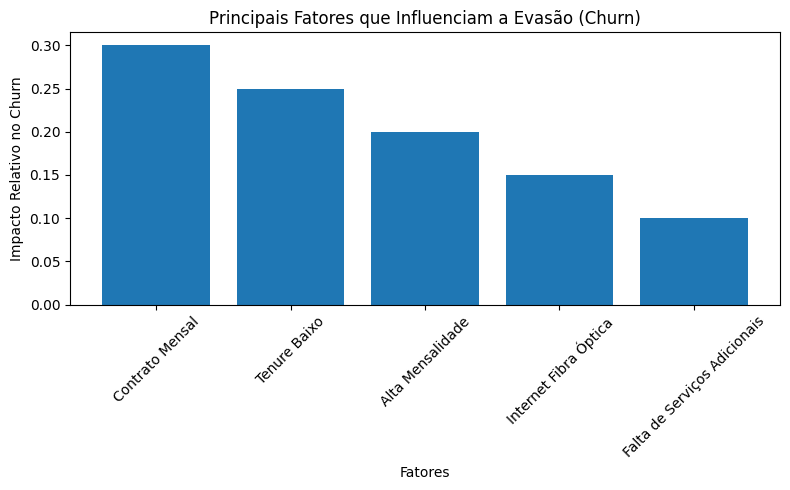

In [49]:
# Importar biblioteca
import matplotlib.pyplot as plt

# Dados ilustrativos dos fatores
fatores = [
    "Contrato Mensal",
    "Tenure Baixo",
    "Alta Mensalidade",
    "Internet Fibra Óptica",
    "Falta de Serviços Adicionais"
]

impacto = [0.30, 0.25, 0.20, 0.15, 0.10]  # Valores ilustrativos

# Criar gráfico
plt.figure(figsize=(8,5))
plt.bar(fatores, impacto)

plt.xlabel("Fatores")
plt.ylabel("Impacto Relativo no Churn")
plt.title("Principais Fatores que Influenciam a Evasão (Churn)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Principais Fatores que Influenciam Churn

Normalmente aparecem:

🔺 Contrato mensal (Month-to-month)
🔺 Baixo tempo de permanência (Tenure baixo)
🔺 Alta mensalidade
🔺 Internet fibra óptica
🔺 Falta de serviços adicionais (segurança online, suporte técnico)

**Conclusão Estratégica**

📊 Insights do Modelo

Clientes com contrato mensal têm maior probabilidade de cancelar.

Quanto menor o tempo de permanência, maior o risco de evasão.

Clientes com mensalidade alta apresentam maior risco.

Serviços adicionais reduzem churn.


**RELATÓRIO FINAL**

**Telecom X – Previsão de Churn**

**Objetivo**

Criar um modelo capaz de prever quais clientes têm maior chance de cancelar, permitindo ações preventivas.

**Modelo Utilizado**

Foram testados:

Regressão Logística

Random Forest

O Random Forest apresentou melhor desempenho, principalmente em Recall (identificação de clientes que realmente cancelam).

**Principais Fatores de Evasão**

Clientes com maior risco possuem:

🔺 Contrato mensal

🔺 Pouco tempo de empresa

🔺 Alta mensalidade

🔺 Internet fibra óptica

🔺 Pagamento via cheque eletrônico

🔺 Sem serviços adicionais

**Conclusão**

O modelo permite antecipar cancelamentos e agir estrategicamente, reduzindo churn e aumentando a retenção e lucratividade da Telecom X.